In [ ]:
#wget <linux download link from miniconda website>
#sh <downloaded file>
#conda create -n youtube
#conda activate youtube
#conda install pip
#pip install notebook
#pip install biopython
#jupyter notebook

In [1]:
from Bio import SeqIO

In [12]:
fasta = list(SeqIO.parse('seqs_ali.fasta', format = 'fasta'))

In [13]:
for entry in fasta:
    print(entry.id)

Wuhan_strain
B.1.1.7|Alpha
B.1.351|Beta
P.1|Gamma
B.1.617|Delta
B.1.1.529|Omicron


In [14]:
seqs = {}
for entry in fasta:
    seqs[entry.id] = entry

In [15]:
seqs['Wuhan_strain']

SeqRecord(seq=Seq('attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgt...aaa'), id='Wuhan_strain', name='Wuhan_strain', description='Wuhan_strain', dbxrefs=[])

In [16]:
seqs['Wuhan_strain'].seq

Seq('attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgt...aaa')

In [17]:
for entry in fasta:
    print(len(entry.seq))

29912
29912
29912
29912
29912
29912


In [ ]:
#mafft
#conda install -c biocore mafft

In [11]:
#!mafft seqs.fasta > seqs_ali.fasta

In [18]:
#21563..25384

In [27]:
def gapped_pos(seq, pos):
    non_gap = 0
    gaps = 0
    for nt in seq:
        if nt != '-':
            non_gap += 1
        else:
            gaps += 1
        if non_gap == pos:
            return pos + gaps

In [28]:
gapped_pos('aaa-aa-a', 6)

8

In [29]:
gapped_pos(seqs['Wuhan_strain'].seq, 21563)

21563

In [30]:
gapped_pos(seqs['Wuhan_strain'].seq, 25384)

25393

In [31]:
spikes = {}
for seq in fasta:
    spikes[seq.id] = seq.seq[21563-1:25393]

In [32]:
for spike in spikes:
    print(spikes[spike][0:10])

atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt


In [33]:
def get_mutations(initial, variant):
    seqs = list(zip(initial, variant))
    for pos, nt in enumerate(seqs):
        if nt[0] != nt[1]:
            print(nt[0].upper() + str(pos) + nt[1].upper())

In [34]:
get_mutations(spikes['Wuhan_strain'], spikes['B.1.1.529|Omicron'])

C199T
T202-
A203-
C204-
A205-
T206-
G207-
C283T
G424-
T425-
G426-
T427-
T428-
T429-
A430-
T431-
T432-
A631-
T632-
T633-
-642G
-643A
-644G
-645C
-646C
-647A
-648G
-649A
-650A
G1024A
T1119C
C1120T
T1125C
C1132T
G1259T
T1328G
G1344A
G1438A
C1441A
A1459C
A1486G
G1494A
A1501G
A1509T
T1521C
C1648A
A1849G
C1971T
T2045G
C2050A
C2300A
G2394T
C2576A
A2870T
T2915A
C2949T
C3446T


In [43]:
with open('spikes.fasta', 'w') as f:
    for spike in spikes:
        out = spikes[spike].replace('-', '').translate()
        f.write('>' + spike + '\n')
        f.write(str(out).upper()+'\n')

In [44]:
!ls

seqs_ali.fasta	seqs.fasta  spikes_ali.fasta  spikes.fasta  Untitled.ipynb


In [47]:
spikes_aa = list(SeqIO.parse('spikes_ali.fasta', format = 'fasta'))

In [48]:
spikes_aa

[SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='Wuhan_strain', name='Wuhan_strain', description='Wuhan_strain', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='B.1.1.7|Alpha', name='B.1.1.7|Alpha', description='B.1.1.7|Alpha', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='B.1.351|Beta', name='B.1.351|Beta', description='B.1.351|Beta', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNFTNRTQLPSAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='P.1|Gamma', name='P.1|Gamma', description='P.1|Gamma', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='B.1.617|Delta', name='B.1.617|Delta', description='B.1.617|Delta', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='B.1.1.529|Omicron', name='B.1.1.529|Omicron', description='B.1.1.529|Omicron', dbxrefs=[])

In [51]:
seqs = {}
for entry in spikes_aa:
    seqs[entry.id] = entry.seq

In [52]:
seqs['Wuhan_strain']

Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT')

In [58]:
def get_aa_mutations(initial, variant):
    out = []
    seqs = list(zip(initial, variant))
    for pos, aa in enumerate(seqs):
        if aa[0] != aa[1]:
            out.append(aa[0].upper() + str(pos) + aa[1].upper())
    return out

In [63]:
len(get_aa_mutations(seqs['Wuhan_strain'], seqs['B.1.617|Delta']))

10

In [65]:
for item in seqs:
    print(item + ' '+str(len(get_aa_mutations(seqs['Wuhan_strain'], seqs[item]))))

Wuhan_strain 0
B.1.1.7|Alpha 10
B.1.351|Beta 10
P.1|Gamma 12
B.1.617|Delta 10
B.1.1.529|Omicron 39


In [66]:
import matplotlib.pyplot as plt

In [72]:
mutations = {}
for item in seqs:
    mutations[item] = get_aa_mutations(seqs['Wuhan_strain'], seqs[item])

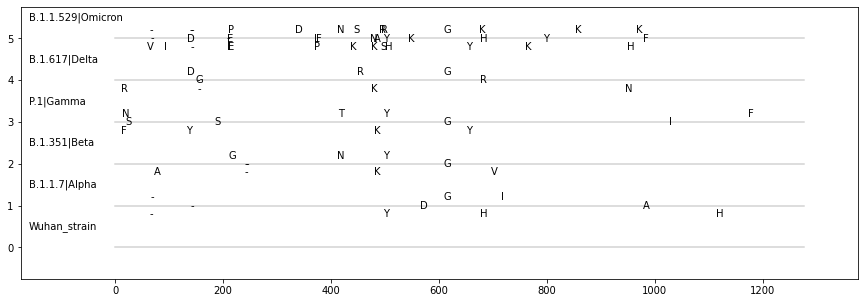

In [90]:
plt.figure(figsize = (15,5))
for y, item in enumerate(seqs):
    plt.plot((0,len(seqs['Wuhan_strain'])), (y,y), color = 'lightgrey')
    plt.text(-160, y+.5, item, va = 'center', ha = 'left')
    
    for yy, mutation in enumerate(mutations[item]):
        pos = int(mutation[1:-1])
        aa_change = mutation[-1]
        if yy%3 == 0:
            plt.text(pos, y-.2, aa_change, va = 'center', ha = 'center')
        elif yy%2 == 0:
            plt.text(pos, y, aa_change, va = 'center', ha = 'center')
        else:
            plt.text(pos, y+.2, aa_change, va = 'center', ha = 'center')
    
    plt.xlim(-175, len(seqs['Wuhan_strain']) + 100)
    plt.ylim(-.75, 5.75)

In [78]:
'AXXasdfdfXB'[1:-1]


'XXasdfdfX'